In [1]:
import pandas as pd

In [2]:
stroke_data = pd.read_csv('healthcare-dataset-stroke-data.csv')


In [3]:
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [12]:
stroke_data.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [4]:
from pycaret import classification


In [5]:
stroke_data.shape


(5110, 12)

In [6]:
stroke_data.describe()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
stroke_data.isnull().sum()


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [22]:
new_data=stroke_data.drop(columns=['bmi','id'])

In [23]:
new_data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke
0,Male,67.00,0,1,Yes,Private,Urban,228.69,formerly smoked,1
1,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,never smoked,1
2,Male,80.00,0,1,Yes,Private,Rural,105.92,never smoked,1
3,Female,49.00,0,0,Yes,Private,Urban,171.23,smokes,1
4,Female,79.00,1,0,Yes,Self-employed,Rural,174.12,never smoked,1
5,Male,81.00,0,0,Yes,Private,Urban,186.21,formerly smoked,1
6,Male,74.00,1,1,Yes,Private,Rural,70.09,never smoked,1
7,Female,69.00,0,0,No,Private,Urban,94.39,never smoked,1
8,Female,59.00,0,0,Yes,Private,Rural,76.15,Unknown,1
9,Female,78.00,0,0,Yes,Private,Urban,58.57,Unknown,1


In [24]:
classification_setup = classification.setup(data= new_data, target='stroke')


Setup Succesfully Completed!


,Description,Value
0,session_id,6351
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(5110, 10)"
4,Missing Values,False
5,Numeric Features,2
6,Categorical Features,7
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [25]:
classification_data = classification.create_model('dt')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9134,0.6192,0.2941,0.2083,0.2439,0.1994,0.2027
1,0.9078,0.5604,0.1765,0.1364,0.1538,0.1059,0.1069
2,0.8966,0.4984,0.0556,0.0476,0.0513,-0.003,-0.003
3,0.919,0.5364,0.1111,0.1333,0.1212,0.0791,0.0795
4,0.919,0.6154,0.2778,0.2381,0.2564,0.2138,0.2146
5,0.905,0.5554,0.1667,0.1364,0.15,0.1002,0.1008
6,0.916,0.5088,0.0588,0.0667,0.0625,0.0187,0.0187
7,0.8936,0.5529,0.1765,0.1111,0.1364,0.0828,0.0853
8,0.9132,0.4794,0,0,0,-0.0449,-0.0452
9,0.9132,0.6471,0.3529,0.2308,0.2791,0.235,0.241


In [26]:
classification_xgb = classification.create_model('xgboost')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9469,0.7764,0.0588,0.25,0.0952,0.0786,0.1012
1,0.9441,0.7545,0.1176,0.2857,0.1667,0.1429,0.1582
2,0.9302,0.7333,0,0,0,-0.029,-0.0325
3,0.9497,0.8949,0.0556,0.5,0.1,0.0909,0.1543
4,0.9441,0.6853,0.1111,0.3333,0.1667,0.1452,0.1691
5,0.9469,0.8533,0.1111,0.4,0.1739,0.1555,0.1905
6,0.9384,0.7898,0,0,0,-0.0221,-0.0267
7,0.9496,0.8061,0.0588,0.3333,0.1,0.087,0.1235
8,0.944,0.7732,0.1176,0.2857,0.1667,0.1429,0.1581
9,0.9496,0.7965,0.0588,0.3333,0.1,0.087,0.1235


In [27]:
classification.compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Logistic Regression,0.9516,0.8348,0.0056,0.1,0.0105,0.0101,0.023,0.2842
1,Ridge Classifier,0.9513,0,0,0,0,0,0,0.0375
2,Ada Boost Classifier,0.9505,0.797,0.0056,0.1,0.0105,0.0081,0.0197,0.3824
3,CatBoost Classifier,0.9499,0.8055,0.0513,0.285,0.0854,0.0758,0.1065,10.96
4,Gradient Boosting Classifier,0.9483,0.8211,0.0229,0.15,0.0396,0.0307,0.0448,0.9098
5,K Neighbors Classifier,0.9466,0.6769,0.0461,0.3267,0.0758,0.062,0.0966,0.0721
6,Light Gradient Boosting Machine,0.9463,0.8041,0.0693,0.2552,0.108,0.0916,0.1131,0.3399
7,Linear Discriminant Analysis,0.9458,0.8275,0.0856,0.3201,0.132,0.1132,0.1413,0.058
8,Random Forest Classifier,0.9455,0.6892,0.0281,0.1933,0.0465,0.0328,0.0509,0.1542
9,SVM - Linear Kernel,0.9446,0,0.0578,0.1302,0.0794,0.0649,0.0707,0.0817


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=6351, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
lr=create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9525,0.8322,0,0,0,0,0
1,0.9525,0.8078,0,0,0,0,0
2,0.9497,0.8309,0,0,0,0,0
3,0.9497,0.8985,0,0,0,0,0
4,0.9525,0.7879,0.0556,1,0.1053,0.1005,0.23
5,0.9497,0.8575,0,0,0,0,0
6,0.9524,0.8464,0,0,0,0,0
7,0.9524,0.8272,0,0,0,0,0
8,0.9524,0.8183,0,0,0,0,0
9,0.9524,0.8412,0,0,0,0,0


In [32]:
tuned_lr = tune_model(lr)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9525,0.837,0,0,0,0,0
1,0.9525,0.8051,0,0,0,0,0
2,0.9497,0.8301,0,0,0,0,0
3,0.9497,0.8989,0,0,0,0,0
4,0.9525,0.7902,0.0556,1,0.1053,0.1005,0.23
5,0.9497,0.8549,0,0,0,0,0
6,0.9524,0.8471,0,0,0,0,0
7,0.9524,0.8235,0,0,0,0,0
8,0.9524,0.8157,0,0,0,0,0
9,0.9524,0.8405,0,0,0,0,0


In [33]:
 tune_model(lr, optimize = 'AUC') 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9525,0.8368,0,0,0,0,0
1,0.9525,0.8082,0,0,0,0,0
2,0.9497,0.8306,0,0,0,0,0
3,0.9497,0.9008,0,0,0,0,0
4,0.9525,0.7876,0.0556,1,0.1053,0.1005,0.23
5,0.9497,0.856,0,0,0,0,0
6,0.9524,0.8472,0,0,0,0,0
7,0.9524,0.8247,0,0,0,0,0
8,0.9524,0.8211,0,0,0,0,0
9,0.9524,0.8413,0,0,0,0,0


LogisticRegression(C=1.297, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=6351, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

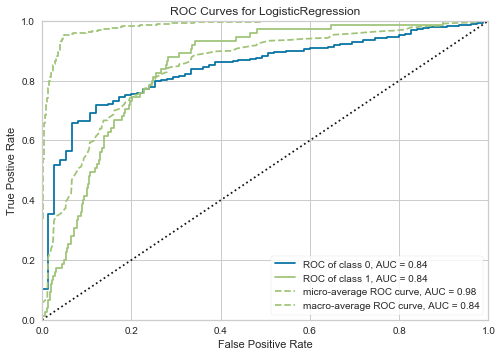

In [34]:
plot_model(tuned_lr, plot = 'auc')


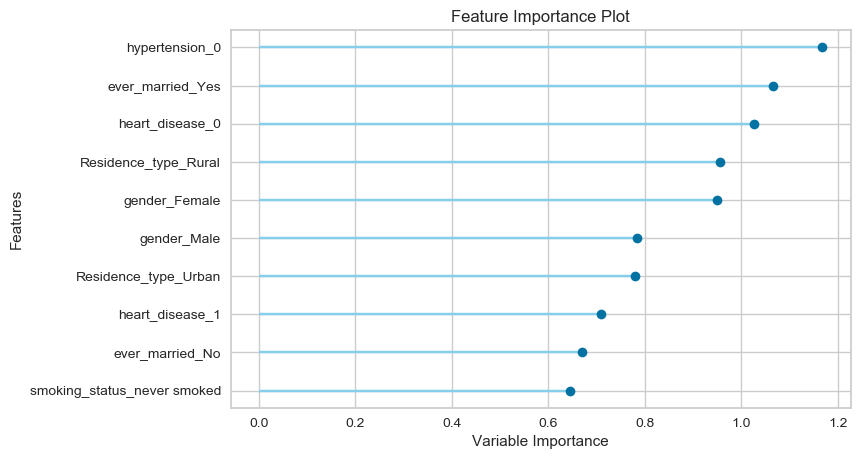

In [36]:
plot_model(tuned_lr, plot='feature')


In [37]:
evaluate_model(tuned_lr)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [38]:
predict_model(tuned_lr);


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9505,0.842,0.0,0.0,0.0,-0.0013,-0.0058


In [43]:
predictions = predict_model(tuned_lr, data=new_data)


In [44]:
predictions

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,Label,Score
0,Male,67.00,0,1,Yes,Private,Urban,228.69,formerly smoked,1,0,0.1651
1,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,never smoked,1,0,0.0358
2,Male,80.00,0,1,Yes,Private,Rural,105.92,never smoked,1,0,0.2241
3,Female,49.00,0,0,Yes,Private,Urban,171.23,smokes,1,0,0.0396
4,Female,79.00,1,0,Yes,Self-employed,Rural,174.12,never smoked,1,0,0.1923
5,Male,81.00,0,0,Yes,Private,Urban,186.21,formerly smoked,1,0,0.2687
6,Male,74.00,1,1,Yes,Private,Rural,70.09,never smoked,1,0,0.2399
7,Female,69.00,0,0,No,Private,Urban,94.39,never smoked,1,0,0.1215
8,Female,59.00,0,0,Yes,Private,Rural,76.15,Unknown,1,0,0.0430
9,Female,78.00,0,0,Yes,Private,Urban,58.57,Unknown,1,0,0.1713


In [45]:
final_model = finalize_model(tuned_lr)


In [47]:
predict_model(final_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9511,0.8542,0.0,0.0,0.0,0.0,0.0


,age,avg_glucose_level,gender_Female,gender_Male,gender_Other,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,ever_married_No,...,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke,Label,Score
0,15.0,142.82,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0,0.0024
1,10.0,63.08,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,0.0019
2,28.0,69.50,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0,0.0044
3,78.0,85.03,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0,0.1826
4,65.0,205.77,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,0,0.1235
5,69.0,61.81,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0,0,0.0947
6,34.0,69.06,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,0.0107
7,51.0,95.33,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0,0.0225
8,28.0,87.91,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0,0.0073
9,19.0,56.85,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0,0.0025


In [48]:
save_model(final_model,'Stroke prediction')


Transformation Pipeline and Model Succesfully Saved


In [49]:
lr_model = load_model(model_name='Stroke prediction')


Transformation Pipeline and Model Successfully Loaded
